<a href="https://colab.research.google.com/github/rawrr17/ML_Pokemon/blob/main/AIML_Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

read the csv file and load dataset

In [4]:
df = pd.read_csv("/content/sample_data/Pokemon.csv")

create target variable

In [6]:
def check_if_mega(x):
  if "Mega" in x:
    return "Yes"
  else:
    return "No"
df['Mega_Evolution'] = df['Name'].apply(check_if_mega)
def is_mega_(x):
  if x == "Yes":
    return 1
  else:
    return 0
df['is_mega'] = df['Mega_Evolution'].apply(is_mega_)

focusing on statistical columns

In [7]:
pokemon_name = df['Name']
columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = df[columns]
y = df['is_mega']

train test split

In [8]:
X_train, X_test, y_train, y_test, names_train, names_test = train_test_split(X, y, pokemon_name, test_size=0.2, random_state=50, stratify = y)

In [9]:
#training logistic regression
clf = LogisticRegression(max_iter=1000, random_state=40)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=40)

In [12]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

confusion matrix (predicted values vs actual values)

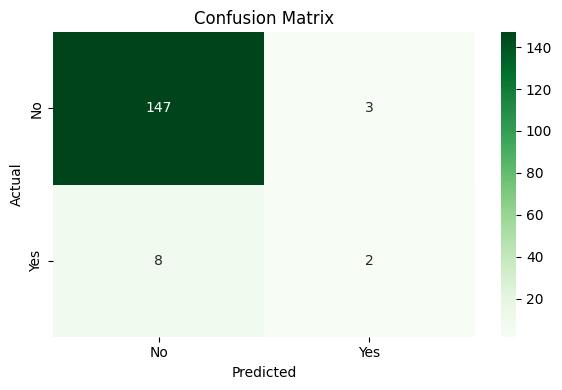

In [16]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(6, 4))
sns.heatmap(conf_mat, annot=True, fmt = "d", cmap="Greens", xticklabels=["No","Yes"], yticklabels=["No","Yes"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("confusion_matrix_logisticreg.png")
plt.show()

ROC Curve (Receiver Operating Characteristic Curve) - true positive rates vs false positive rates

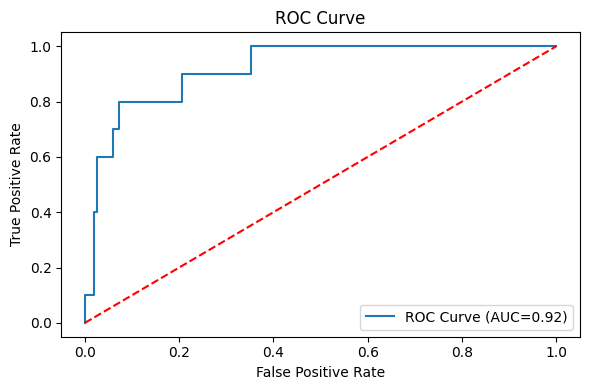

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,label=f"ROC Curve (AUC={roc_auc:.2f})")
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.savefig("roc_curve_logisticreg.png")
plt.show()

Precision-Recall Curve - precision vs recall

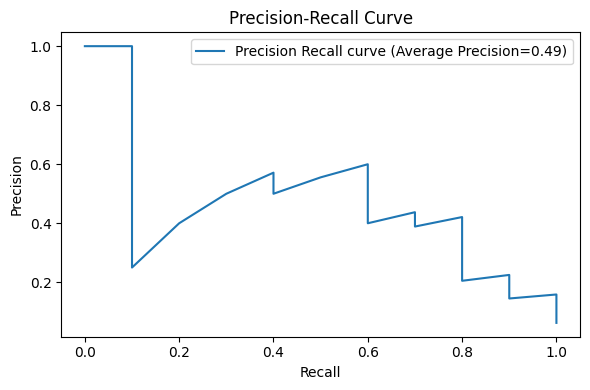

In [21]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f"Precision Recall curve (Average Precision={avg_precision:.2f})")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.tight_layout()
plt.savefig("prc_logisticreg.png")
plt.show()


Saving final predictions

In [22]:
df['Predicted_Mega'] = clf.predict(X)
df['Predicted_Mega'] = df['Predicted_Mega'].apply(lambda x: "Yes" if x == 1 else "No")


In [23]:
output_df = df[['Name', 'Predicted_Mega']].rename(columns={"Name":"Pokemon","Predicted_Mega":"Mega_Evolution"})
output_df.to_csv("model.csv", index=False)
